In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [1]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

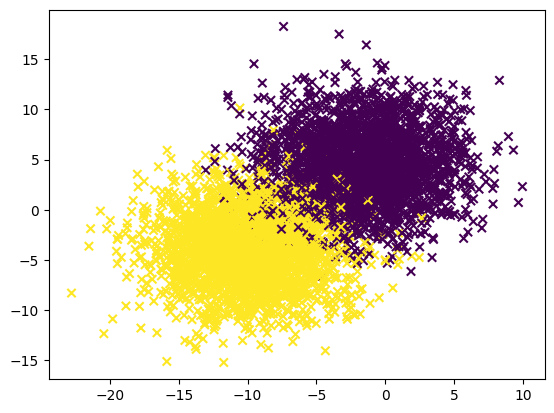

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. In this notebook, we will:

- Do regression using Numpy, so that it can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Then, we will calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $
- Our classification splits the dataset at a specific line between the two clusters. We will plot this line so we can visualize where exactly does the classification happens.
- We will then print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib

## Solution

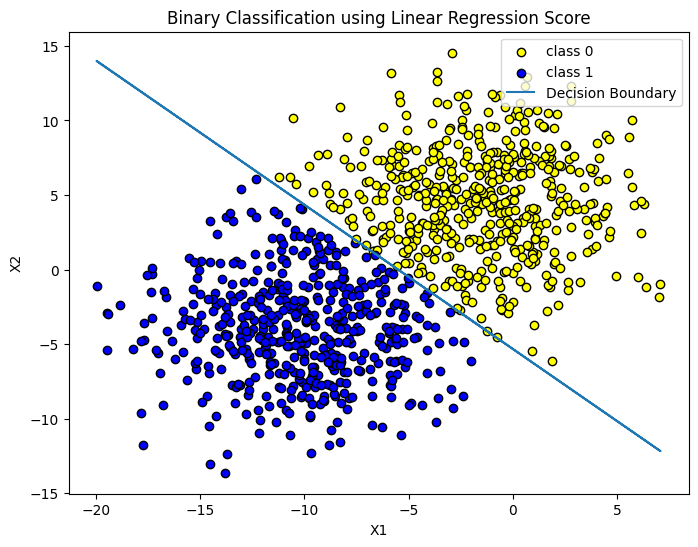

0.952
              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95       504
     class 1       0.95      0.95      0.95       496

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
##We measure the distance of the decision boundry, as a normal vector of the decision boundry line


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

ones = np.ones(X_train.shape[0]) # create a vector of ones with the same length as the dataset
X_ = np.c_[X_train, ones] # concatenate the ones with the dataset
ones = np.ones(X_test.shape[0]) # create a vector of ones with the same length as the dataset
X_test_ = np.c_[X_test, ones] # concatenate the ones with the dataset

weights = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X_.transpose(), X_)), X_.transpose()), y_train)



X_test_mat = np.matrix(X_test_)
scores = X_test_mat @ weights

th = 0.5


prediction = (scores >= th).astype(int)
#from matrix to array
prediction = np.array(prediction)[0]

plt.figure(figsize=(8, 6))
class0 = 0
class1 = 0
for i, point in enumerate(X_test_):
    if prediction[i] == 0:
        if class0 == 0:
            plt.scatter(point[0], point[1], color="yellow", label = "class 0", edgecolor="k")
            class0 = 1
        else:
            plt.scatter(point[0], point[1], color="yellow", edgecolor="k")
    else:
        if class1 == 0:
            plt.scatter(point[0], point[1], color="blue", label = "class 1",  edgecolor="k")
            class1 = 1
        else:
            plt.scatter(point[0], point[1], color="blue",  edgecolor="k")

#Get the weights and bias
bias = weights[2]
x1 = X_test[:,0]
x2 = X_test[:,1]
w1 = weights[0]
w2 = weights[1]

decisio_b = - (w1*x1 + bias-th)/w2

plt.plot(x1, decisio_b, label='Decision Boundary')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Binary Classification using Linear Regression Score")
plt.show()

#acc = accuracy_score(y_test, prediction)
#print(acc)



acc = accuracy_score(y_test, prediction)
print(acc)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, prediction, target_names=target_names))


In [6]:
print(weights)

[-0.04373889 -0.04527877  0.25925274]


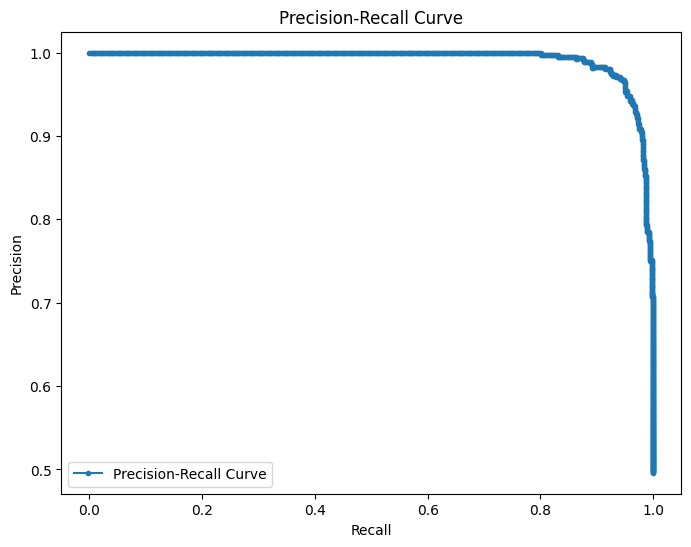

In [7]:
scores = np.array(scores)[0]
precision, recall, _ = precision_recall_curve(y_test, scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [8]:
# Compute confusion matrix components
TP = np.sum((prediction == 1) & (y_test == 1))
TN = np.sum((prediction == 0) & (y_test == 0))
FP = np.sum((prediction == 1) & (y_test == 0))
FN = np.sum((prediction == 0) & (y_test == 1))

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.95
Recall: 0.95
F1 Score: 0.95


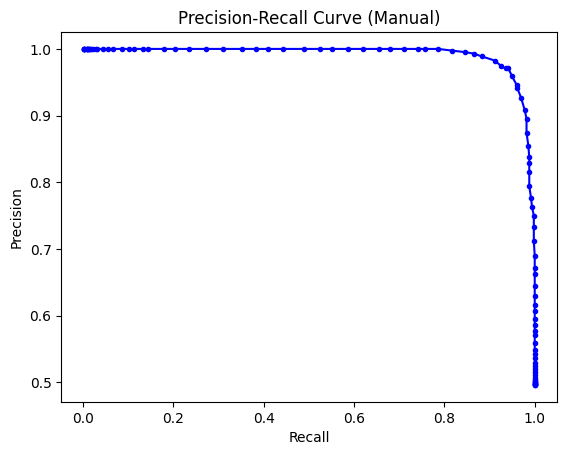

In [9]:
# Generate precision-recall points manually
thresholds = np.linspace(scores.min(), scores.max(), 100)
precision_values = []
recall_values = []

for threshold in thresholds:
    predicted_class = (scores >= threshold).astype(int)
    
    TP = np.sum((predicted_class == 1) & (y_test == 1))
    FP = np.sum((predicted_class == 1) & (y_test == 0))
    FN = np.sum((predicted_class == 0) & (y_test == 1))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    precision_values.append(precision)
    recall_values.append(recall)

# Plot manual precision-recall curve
plt.plot(recall_values, precision_values, marker='.', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Manual)')
plt.show()
